**CS 677 Deep Learning Final Project**

**Import all required packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
import time
from google.colab import files

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance to fetch detch of GLD shares directly from the yahoo finance website
import fix_yahoo_finance as yf
yf.pdr_override()

# Feature Scaling for fast training of neural networks
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM



**Reading dataset**

In [ ]:
# input values
symbol = 'GLD' # SPDR Gold Shares ticker symbol
start_date = '2004-11-18'
#end_date = '2020-10-04'
today = date.today()  #fetching today's date
end_date = today.strftime("%Y-%m-%d")
print(end_date)
# Read data from the website
df = yf.download(symbol,start_date,end_date)

# View data related information
print(df.tail())
print(len(df))
print(df.info()) # check for whether any null values
print(df.index)  #type of index

df1=df
df1['TradeDate']=df.index.day

2020-12-16
[*********************100%***********************]  1 of 1 downloaded
                  Open        High  ...   Adj Close    Volume
Date                                ...                      
2020-12-09  173.919998  174.039993  ...  172.500000  10743200
2020-12-10  172.899994  173.580002  ...  172.169998   6564000
2020-12-11  172.250000  173.320007  ...  172.490005   6084800
2020-12-14  171.910004  172.520004  ...  171.539993   7639500
2020-12-15  173.429993  173.979904  ...  173.940002   6785987

[5 rows x 6 columns]
4047
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4047 entries, 2004-11-18 to 2020-12-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4047 non-null   float64
 1   High       4047 non-null   float64
 2   Low        4047 non-null   float64
 3   Close      4047 non-null   float64
 4   Adj Close  4047 non-null   float64
 5   Volume     4047 non-null   int64  
dtypes: float6

In [ ]:
df.tail(1)

,Open,High,Low,Close,Adj Close,Volume,TradeDate
Date,,,,,,,
2020-12-15,173.429993,173.979904,173.054993,173.940002,173.940002,6785987,15


**Data visualization and graph plotting**

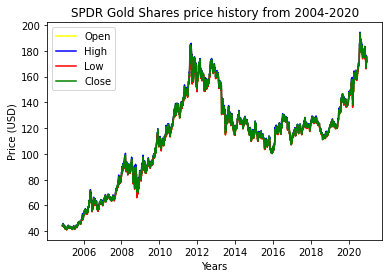

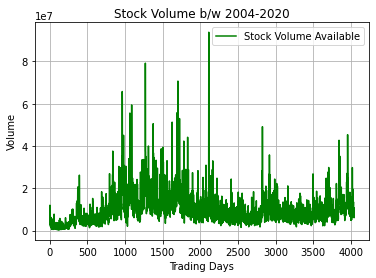

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.figure()
plt.plot(df["Open"],c="yellow")
plt.plot(df["High"],c="blue")
plt.plot(df["Low"],c="red")
plt.plot(df["Close"],c="green")
plt.title('SPDR Gold Shares price history from 2004-2020')
plt.ylabel('Price (USD)')
plt.xlabel('Years')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.savefig('All_comparison.png', bbox_inches='tight')
plt.show()

plt.subplot()
x = np.arange(0, df.shape[0], 1)
plt.plot(x, df.Volume.values, color = "green", label = "Stock Volume Available")
plt.title("Stock Volume b/w 2004-2020")
plt.xlabel("Trading Days")
plt.ylabel("Volume")
plt.legend(loc = "best")
plt.grid(which = "major", axis = "both")
plt.savefig('Volumes.png', bbox_inches='tight')
plt.show()

files.download("All_comparison.png") 
files.download("Volumes.png")

**Prediction for Open prices of stocks**

In [ ]:
print('###Step 1###')
#Step 1

# Extracting the open prices feature of each day
Featured_Data_Open=df[['Open']].values
print(Featured_Data_Open[0:2])
 
#data normalization
sc=MinMaxScaler()
 
DataScaler_Open = sc.fit(Featured_Data_Open)
X=DataScaler_Open.transform(Featured_Data_Open)

print('###Step 2###')
#Step 2

# split into samples
X_samples = list()
y_samples = list()
 
NumerOfRows = len(X)
TimeSteps=60  # next day's Price Prediction is based on last how many past day's prices
 
# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)
 
# Reshape the Input as a 3D (number of samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
 
# Donot reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)

###Step 1###
[[44.43    ]
 [44.490002]]
###Step 2###


In [ ]:
print('###Step 3###')
#Step 3

TestingRecords=20

# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]
 
# Printing the shape of training and testing
#print('\nTraining Data shape')
print(X_train.shape)
print(y_train.shape)
#print('\nTesting Data shape')
print(X_test.shape)
print(y_test.shape)

# Visualizing the input and output being sent to the LSTM model
for inp, out in zip(X_train[0:2], y_train[0:2]):
    print(inp,'--', out)

# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

#Model running

# Initialising the RNN
model_Open = Sequential()
 
# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
model_Open.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Second Second hidden layer and the LSTM layer
model_Open.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Second Third hidden layer and the LSTM layer
model_Open.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))
 
 
# Adding the output layer
model_Open.add(Dense(units = 1))
 
# Compiling the RNN
model_Open.compile(optimizer = 'adam', loss = 'mean_squared_error')
 
##################################################
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Fitting the RNN to the Training set
model_Open.fit(X_train, y_train, batch_size =32, epochs = 100)
 
EndTime=time.time()
print("Total Time Taken by the model: ", round((EndTime-StartTime)/60), 'Minutes ##')

###Step 3###
(3967, 60, 1)
(3967, 1)
(20, 60, 1)
(20, 1)
[[0.02226443]
 [0.02265734]
 [0.0243599 ]
 [0.0252112 ]
 [0.02553861]
 [0.02763408]
 [0.02665182]
 [0.02841988]
 [0.02783053]
 [0.02959858]
 [0.02625893]
 [0.02855085]
 [0.02796149]
 [0.01813896]
 [0.01781154]
 [0.01532316]
 [0.01689478]
 [0.01787701]
 [0.02010346]
 [0.01938316]
 [0.01899025]
 [0.02160961]
 [0.02029993]
 [0.02075831]
 [0.02056184]
 [0.02134766]
 [0.02219893]
 [0.01892475]
 [0.01617445]
 [0.01846637]
 [0.01276931]
 [0.0115906 ]
 [0.01126318]
 [0.00949513]
 [0.00694127]
 [0.00628644]
 [0.00772706]
 [0.00975706]
 [0.00890577]
 [0.0075961 ]
 [0.00779256]
 [0.01060836]
 [0.00713771]
 [0.00844739]
 [0.01119771]
 [0.00982254]
 [0.01021545]
 [0.00949513]
 [0.01100124]
 [0.00772706]
 [0.00694127]
 [0.00779256]
 [0.00347064]
 [0.00366709]
 [0.00340515]
 [0.00104774]
 [0.        ]
 [0.00327418]
 [0.00563159]
 [0.00910221]] -- [0.00897127]
[[0.02265734]
 [0.0243599 ]
 [0.0252112 ]
 [0.02553861]
 [0.02763408]
 [0.02665182]
 [

###Step 4###
Accuracy: 98.07646201156037
###Step 5###


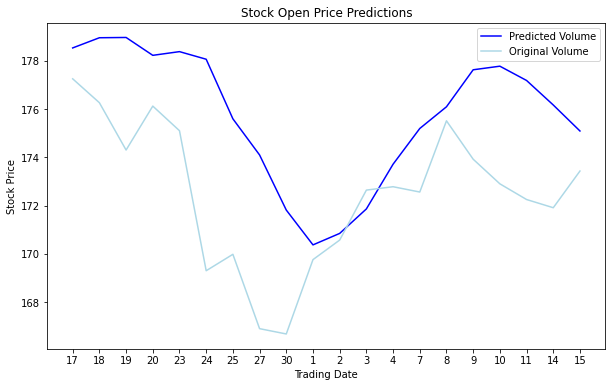

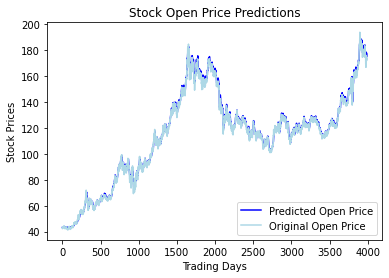

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


###Step 6 Prediction for the next day###


array([[174.83768]], dtype=float32)

In [ ]:
print('###Step 4###')
#Step 4

#Predictions
# Making predictions on test data
predicted_Price_Open = model_Open.predict(X_test)
predicted_Price_Open = DataScaler_Open.inverse_transform(predicted_Price_Open)
 
# Getting the original price values for testing data
orig=y_test
orig=DataScaler_Open.inverse_transform(y_test)
 
# Accuracy of the predictions
print('Accuracy:', 100 - (100*(abs(orig-predicted_Price_Open)/orig)).mean())


print('###Step 5###')
#Step 5

#Visualizing the results
# Generating predictions on full data
TrainPredictions=DataScaler_Open.inverse_transform(model_Open.predict(X_train))
TestPredictions=DataScaler_Open.inverse_transform(model_Open.predict(X_test))
 
Featured_Data_OpenPredictions=np.append(TrainPredictions, TestPredictions)
Featured_Data_OpenOrig=Featured_Data_Open[TimeSteps:]
 
# plotting the full data

plt.plot(predicted_Price_Open, color = 'blue', label = 'Predicted Volume')
plt.plot(orig, color = 'lightblue', label = 'Original Volume')
 
plt.title('Stock Open Price Predictions')
plt.xlabel('Trading Date')

plt.xticks(range(TestingRecords), df1.tail(TestingRecords)['TradeDate'])
plt.ylabel('Stock Price')
 
plt.legend()
fig=plt.gcf()
fig.set_figwidth(10)
fig.set_figheight(6)
plt.savefig('Open.png', bbox_inches='tight')
plt.show()

plt.plot(Featured_Data_OpenPredictions, color = 'blue', label = 'Predicted Open Price')
plt.plot(Featured_Data_OpenOrig , color = 'lightblue', label = 'Original Open Price')
plt.title('Stock Open Price Predictions')
plt.xlabel('Trading Days')
plt.ylabel('Stock Prices')
plt.legend()
fig=plt.gcf()
plt.savefig('Open price prediction.png', bbox_inches='tight')
plt.show()

files.download("Open.png")
files.download("Open price prediction.png") 

print('\n###Step 6 Prediction for the next day###')
#Step 6
# Prediction for the next day

#Taking values for last 60 days
temp = Featured_Data_Open[len(Featured_Data_Open)-TimeSteps:len(Featured_Data_Open)]

# Last 60 days open prices
Last60Days=np.array(temp)

# Normalizing the data just like we did for training the model
Last60Days=DataScaler_Open.transform(Last60Days.reshape(-1,1))
 
# Changing the shape of the data to 3D
# Choosing TimeSteps as 60 because we have used the same for training
NumSamples=1
TimeSteps=60
NumFeatures=1
Last60Days= Last60Days.reshape(NumSamples,TimeSteps,NumFeatures)

# Making predictions on data
predicted_Price_Open = model_Open.predict(Last60Days)
predicted_Price_Open = DataScaler_Open.inverse_transform(predicted_Price_Open)
predicted_Price_Open

**Predictions for High prices of stock**

###Step 1###
[[44.490002]
 [44.919998]]
###Step 2###
###Step 3###
(3967, 60, 1)
(3967, 1)
(20, 60, 1)
(20, 1)
[[0.0204455 ]
 [0.02325428]
 [0.0235809 ]
 [0.02325428]
 [0.02410346]
 [0.02769611]
 [0.02704291]
 [0.02645502]
 [0.0276308 ]
 [0.02750016]
 [0.03030896]
 [0.02684695]
 [0.02586713]
 [0.01737539]
 [0.01659155]
 [0.0146319 ]
 [0.01731006]
 [0.01593832]
 [0.0183552 ]
 [0.01757135]
 [0.01868182]
 [0.01966162]
 [0.01881247]
 [0.01874714]
 [0.01953098]
 [0.02090274]
 [0.02031485]
 [0.01737539]
 [0.01646091]
 [0.01685282]
 [0.01182309]
 [0.01012476]
 [0.0099288 ]
 [0.00783853]
 [0.00672806]
 [0.00463779]
 [0.00600952]
 [0.00934091]
 [0.00809979]
 [0.00627081]
 [0.00666275]
 [0.00842642]
 [0.00627081]
 [0.00953687]
 [0.00953687]
 [0.00783853]
 [0.00927558]
 [0.00842642]
 [0.00894898]
 [0.00614017]
 [0.00509503]
 [0.00568293]
 [0.00248221]
 [0.00189432]
 [0.00124109]
 [0.00026129]
 [0.        ]
 [0.0031354 ]
 [0.00522568]
 [0.00829577]] -- [0.00809979]
[[0.02325428]
 [0.0235809 ]
 [0.0

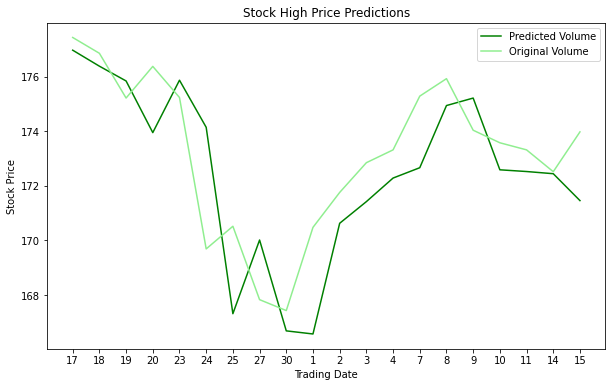

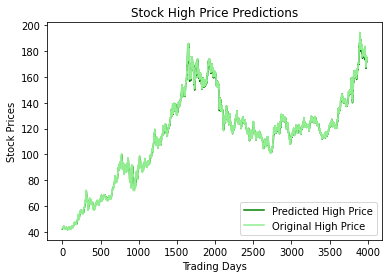

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


###Step 6 Prediction for the next day###


array([[173.50078]], dtype=float32)

In [ ]:
print('###Step 1###')
#Step 1

# Extracting the High prices feature of each day
Featured_Data_High=df[['High']].values
print(Featured_Data_High[0:2])
 
#data normalization
sc=MinMaxScaler()
 
DataScaler_High = sc.fit(Featured_Data_High)
X=DataScaler_High.transform(Featured_Data_High)

print('###Step 2###')
#Step 2

# split into samples
X_samples = list()
y_samples = list()
 
NumerOfRows = len(X)
TimeSteps=60  # next day's Price Prediction is based on last how many past day's prices
 
# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)
 
# Reshape the Input as a 3D (number of samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
 
# Donot reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)



print('###Step 3###')
#Step 3

TestingRecords=20

# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]
 
# Printing the shape of training and testing
#print('\nTraining Data shape')
print(X_train.shape)
print(y_train.shape)
#print('\nTesting Data shape')
print(X_test.shape)
print(y_test.shape)

# Visualizing the input and output being sent to the LSTM model
for inp, out in zip(X_train[0:2], y_train[0:2]):
    print(inp,'--', out)

# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

#Model running

# Initialising the RNN
model_High = Sequential()
 
# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
model_High.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Second Second hidden layer and the LSTM layer
model_High.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Second Third hidden layer and the LSTM layer
model_High.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))
 
 
# Adding the output layer
model_High.add(Dense(units = 1))
 
# Compiling the RNN
model_High.compile(optimizer = 'adam', loss = 'mean_squared_error')
 
##################################################
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Fitting the RNN to the Training set
model_High.fit(X_train, y_train, batch_size =32, epochs = 100)
 
EndTime=time.time()
print("Total Time Taken by the model: ", round((EndTime-StartTime)/60), 'Minutes ##')



print('###Step 4###')
#Step 4

#Predictions
# Making predictions on test data
predicted_Price_High = model_High.predict(X_test)
predicted_Price_High = DataScaler_High.inverse_transform(predicted_Price_High)
 
# Getting the original price values for testing data
orig=y_test
orig=DataScaler_High.inverse_transform(y_test)
 
# Accuracy of the predictions
print('Accuracy:', 100 - (100*(abs(orig-predicted_Price_High)/orig)).mean())


print('###Step 5###')
#Step 5

#Visualizing the results
# Generating predictions on full data
TrainPredictions=DataScaler_High.inverse_transform(model_High.predict(X_train))
TestPredictions=DataScaler_High.inverse_transform(model_High.predict(X_test))
 
Featured_Data_HighPredictions=np.append(TrainPredictions, TestPredictions)
Featured_Data_HighOrig=Featured_Data_High[TimeSteps:]
 
# plotting the full data

plt.plot(predicted_Price_High, color = 'green', label = 'Predicted Volume')
plt.plot(orig, color = 'lightgreen', label = 'Original Volume')
 
plt.title('Stock High Price Predictions')
plt.xlabel('Trading Date')

plt.xticks(range(TestingRecords), df1.tail(TestingRecords)['TradeDate'])
plt.ylabel('Stock Price')
 
plt.legend()
fig=plt.gcf()
fig.set_figwidth(10)
fig.set_figheight(6)
plt.savefig('High.png', bbox_inches='tight')
plt.show()

plt.plot(Featured_Data_HighPredictions, color = 'green', label = 'Predicted High Price')
plt.plot(Featured_Data_HighOrig , color = 'lightgreen', label = 'Original High Price')
plt.title('Stock High Price Predictions')
plt.xlabel('Trading Days')
plt.ylabel('Stock Prices')
plt.legend()
fig=plt.gcf()
plt.savefig('High price prediction.png', bbox_inches='tight')
plt.show()

files.download("High.png")
files.download("High price prediction.png") 

print('\n###Step 6 Prediction for the next day###')
#Step 6
# Prediction for the next day

#Taking values for last 60 days
temp = Featured_Data_High[len(Featured_Data_High)-TimeSteps:len(Featured_Data_High)]

# Last 60 days High prices
Last60Days=np.array(temp)

# Normalizing the data just like we did for training the model
Last60Days=DataScaler_High.transform(Last60Days.reshape(-1,1))
 
# Changing the shape of the data to 3D
# Choosing TimeSteps as 60 because we have used the same for training
NumSamples=1
TimeSteps=60
NumFeatures=1
Last60Days= Last60Days.reshape(NumSamples,TimeSteps,NumFeatures)

# Making predictions on data
predicted_Price_High = model_High.predict(Last60Days)
predicted_Price_High = DataScaler_High.inverse_transform(predicted_Price_High)
predicted_Price_High


**Predictions for Low prices of stock**

###Step 1###
[[44.07    ]
 [44.470001]]
###Step 2###
###Step 3###
(3967, 60, 1)
(3967, 1)
(20, 60, 1)
(20, 1)
[[0.02013201]
 [0.02277228]
 [0.02455447]
 [0.02442245]
 [0.02488449]
 [0.02666667]
 [0.02679869]
 [0.02508251]
 [0.02798678]
 [0.02415842]
 [0.02495049]
 [0.02699671]
 [0.02673267]
 [0.01544555]
 [0.01438945]
 [0.01511552]
 [0.01643563]
 [0.01643563]
 [0.0191419 ]
 [0.0168977 ]
 [0.01821781]
 [0.02052806]
 [0.01999999]
 [0.01894389]
 [0.01999999]
 [0.02145214]
 [0.02158416]
 [0.01537952]
 [0.01630364]
 [0.01788779]
 [0.01135315]
 [0.00950494]
 [0.01042903]
 [0.00693069]
 [0.00448846]
 [0.00574257]
 [0.00726072]
 [0.00963696]
 [0.00871287]
 [0.00732674]
 [0.00745876]
 [0.00778879]
 [0.00719473]
 [0.00838284]
 [0.01089108]
 [0.0071287 ]
 [0.01016502]
 [0.00910892]
 [0.00930693]
 [0.00620461]
 [0.00613862]
 [0.00660066]
 [0.00316832]
 [0.00244224]
 [0.00125412]
 [0.00019801]
 [0.        ]
 [0.00283829]
 [0.00534655]
 [0.00858086]] -- [0.00871287]
[[0.02277228]
 [0.02455447]
 [0.0

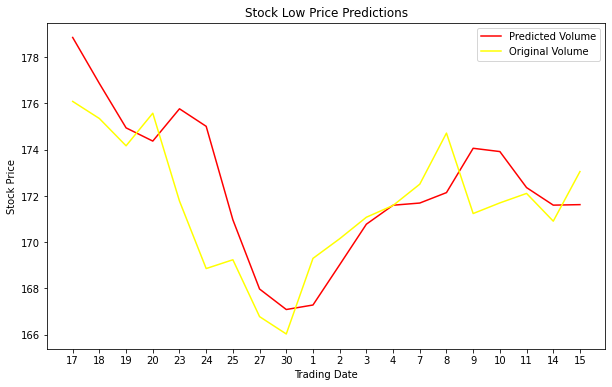

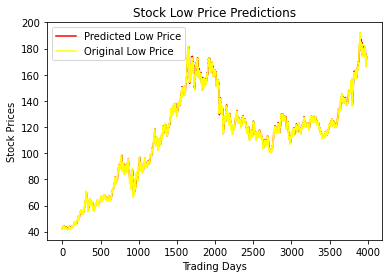

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


###Step 6 Prediction for the next day###


array([[173.03603]], dtype=float32)

In [ ]:
print('###Step 1###')
#Step 1

# Extracting the Low prices feature of each day
Featured_Data_Low=df[['Low']].values
print(Featured_Data_Low[0:2])
 
#data normalization
sc=MinMaxScaler()
 
DataScaler_Low = sc.fit(Featured_Data_Low)
X=DataScaler_Low.transform(Featured_Data_Low)

print('###Step 2###')
#Step 2

# split into samples
X_samples = list()
y_samples = list()
 
NumerOfRows = len(X)
TimeSteps=60  # next day's Price Prediction is based on last how many past day's prices
 
# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)
 
# Reshape the Input as a 3D (number of samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
 
# Donot reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)



print('###Step 3###')
#Step 3

TestingRecords=20

# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]
 
# Printing the shape of training and testing
#print('\nTraining Data shape')
print(X_train.shape)
print(y_train.shape)
#print('\nTesting Data shape')
print(X_test.shape)
print(y_test.shape)

# Visualizing the input and output being sent to the LSTM model
for inp, out in zip(X_train[0:2], y_train[0:2]):
    print(inp,'--', out)

# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

#Model running

# Initialising the RNN
model_Low = Sequential()
 
# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
model_Low.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Second Second hidden layer and the LSTM layer
model_Low.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Second Third hidden layer and the LSTM layer
model_Low.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))
 
 
# Adding the output layer
model_Low.add(Dense(units = 1))
 
# Compiling the RNN
model_Low.compile(optimizer = 'adam', loss = 'mean_squared_error')
 
##################################################
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Fitting the RNN to the Training set
model_Low.fit(X_train, y_train, batch_size =32, epochs = 100)
 
EndTime=time.time()
print("Total Time Taken by the model: ", round((EndTime-StartTime)/60), 'Minutes ##')



print('###Step 4###')
#Step 4

#Predictions
# Making predictions on test data
predicted_Price_Low = model_Low.predict(X_test)
predicted_Price_Low = DataScaler_Low.inverse_transform(predicted_Price_Low)
 
# Getting the original price values for testing data
orig=y_test
orig=DataScaler_Low.inverse_transform(y_test)
 
# Accuracy of the predictions
print('Accuracy:', 100 - (100*(abs(orig-predicted_Price_Low)/orig)).mean())


print('###Step 5###')
#Step 5

#Visualizing the results
# Generating predictions on full data
TrainPredictions=DataScaler_Low.inverse_transform(model_Low.predict(X_train))
TestPredictions=DataScaler_Low.inverse_transform(model_Low.predict(X_test))
 
Featured_Data_LowPredictions=np.append(TrainPredictions, TestPredictions)
Featured_Data_LowOrig=Featured_Data_Low[TimeSteps:]
 
# plotting the full data

plt.plot(predicted_Price_Low, color = 'red', label = 'Predicted Volume')
plt.plot(orig, color = 'yellow', label = 'Original Volume')
 
plt.title('Stock Low Price Predictions')
plt.xlabel('Trading Date')

plt.xticks(range(TestingRecords), df1.tail(TestingRecords)['TradeDate'])
plt.ylabel('Stock Price')
 
plt.legend()
fig=plt.gcf()
fig.set_figwidth(10)
fig.set_figheight(6)
plt.savefig('Low.png', bbox_inches='tight')
plt.show()

plt.plot(Featured_Data_LowPredictions, color = 'red', label = 'Predicted Low Price')
plt.plot(Featured_Data_LowOrig , color = 'yellow', label = 'Original Low Price')
plt.title('Stock Low Price Predictions')
plt.xlabel('Trading Days')
plt.ylabel('Stock Prices')
plt.legend()
fig=plt.gcf()
plt.savefig('Low price prediction.png', bbox_inches='tight')
plt.show()

files.download("Low.png")
files.download("Low price prediction.png") 

print('\n###Step 6 Prediction for the next day###')
#Step 6
# Prediction for the next day

#Taking values for last 60 days
temp = Featured_Data_Low[len(Featured_Data_Low)-TimeSteps:len(Featured_Data_Low)]

# Last 60 days Low prices
Last60Days=np.array(temp)

# Normalizing the data just like we did for training the model
Last60Days=DataScaler_Low.transform(Last60Days.reshape(-1,1))
 
# Changing the shape of the data to 3D
# Choosing TimeSteps as 60 because we have used the same for training
NumSamples=1
TimeSteps=60
NumFeatures=1
Last60Days= Last60Days.reshape(NumSamples,TimeSteps,NumFeatures)

# Making predictions on data
predicted_Price_Low = model_Low.predict(Last60Days)
predicted_Price_Low = DataScaler_Low.inverse_transform(predicted_Price_Low)
predicted_Price_Low


**Predictions for Close prices of stock**

###Step 1###
[[44.380001]
 [44.779999]]
###Step 2###
###Step 3###
(3967, 60, 1)
(3967, 1)
(20, 60, 1)
(20, 1)
[[2.04416103e-02]
 [2.30623139e-02]
 [2.41761317e-02]
 [2.28657667e-02]
 [2.48312977e-02]
 [2.64037409e-02]
 [2.71244446e-02]
 [2.52899232e-02]
 [2.69934022e-02]
 [2.41761317e-02]
 [2.84347767e-02]
 [2.56175062e-02]
 [2.52244184e-02]
 [1.80174276e-02]
 [1.65105221e-02]
 [1.42829128e-02]
 [1.73622616e-02]
 [1.50036099e-02]
 [1.78864180e-02]
 [1.58553494e-02]
 [1.91967567e-02]
 [2.01795321e-02]
 [1.93933236e-02]
 [1.80829587e-02]
 [1.97209066e-02]
 [2.10967829e-02]
 [2.03760793e-02]
 [1.57243136e-02]
 [1.68381313e-02]
 [1.66415579e-02]
 [1.15311668e-02]
 [9.69667818e-03]
 [9.23802654e-03]
 [5.83112097e-03]
 [3.80005239e-03]
 [4.52075605e-03]
 [6.22420883e-03]
 [8.77940111e-03]
 [8.77940111e-03]
 [6.94491249e-03]
 [6.94491249e-03]
 [6.55179187e-03]
 [6.48628706e-03]
 [9.69667818e-03]
 [9.89321883e-03]
 [6.42078224e-03]
 [9.36906893e-03]
 [8.91044350e-03]
 [9.36906893e-03]
 [6.2897

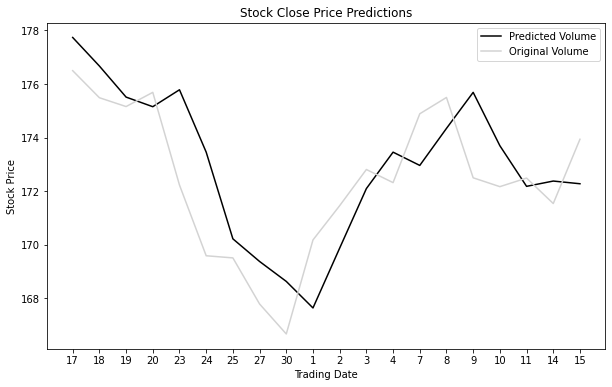

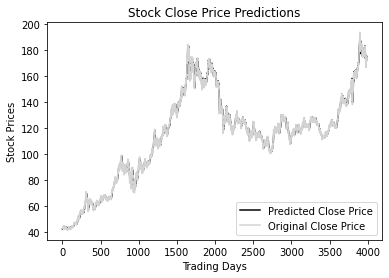

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


###Step 6 Prediction for the next day###


array([[173.95924]], dtype=float32)

In [ ]:
print('###Step 1###')
#Step 1

# Extracting the Close prices feature of each day
Featured_Data_Close=df[['Close']].values
print(Featured_Data_Close[0:2])
 
#data normalization
sc=MinMaxScaler()
 
DataScaler_Close = sc.fit(Featured_Data_Close)
X=DataScaler_Close.transform(Featured_Data_Close)

print('###Step 2###')
#Step 2

# split into samples
X_samples = list()
y_samples = list()
 
NumerOfRows = len(X)
TimeSteps=60  # next day's Price Prediction is based on last how many past day's prices
 
# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)
 
# Reshape the Input as a 3D (number of samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
 
# Donot reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)



print('###Step 3###')
#Step 3

TestingRecords=20

# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]
 
# Printing the shape of training and testing
#print('\nTraining Data shape')
print(X_train.shape)
print(y_train.shape)
#print('\nTesting Data shape')
print(X_test.shape)
print(y_test.shape)

# Visualizing the input and output being sent to the LSTM model
for inp, out in zip(X_train[0:2], y_train[0:2]):
    print(inp,'--', out)

# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

#Model running

# Initialising the RNN
model_Close = Sequential()
 
# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
model_Close.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Second Second hidden layer and the LSTM layer
model_Close.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Second Third hidden layer and the LSTM layer
model_Close.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))
 
 
# Adding the output layer
model_Close.add(Dense(units = 1))
 
# Compiling the RNN
model_Close.compile(optimizer = 'adam', loss = 'mean_squared_error')
 
##################################################
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Fitting the RNN to the Training set
model_Close.fit(X_train, y_train, batch_size =32, epochs = 100)
 
EndTime=time.time()
print("Total Time Taken by the model: ", round((EndTime-StartTime)/60), 'Minutes ##')



print('###Step 4###')
#Step 4

#Predictions
# Making predictions on test data
predicted_Price_Close = model_Close.predict(X_test)
predicted_Price_Close = DataScaler_Close.inverse_transform(predicted_Price_Close)
 
# Getting the original price values for testing data
orig=y_test
orig=DataScaler_Close.inverse_transform(y_test)
 
# Accuracy of the predictions
print('Accuracy:', 100 - (100*(abs(orig-predicted_Price_Close)/orig)).mean())


print('###Step 5###')
#Step 5

#Visualizing the results
# Generating predictions on full data
TrainPredictions=DataScaler_Close.inverse_transform(model_Close.predict(X_train))
TestPredictions=DataScaler_Close.inverse_transform(model_Close.predict(X_test))
 
Featured_Data_ClosePredictions=np.append(TrainPredictions, TestPredictions)
Featured_Data_CloseOrig=Featured_Data_Close[TimeSteps:]
 
# plotting the full data

plt.plot(predicted_Price_Close, color = 'black', label = 'Predicted Volume')
plt.plot(orig, color = 'lightgrey', label = 'Original Volume')
 
plt.title('Stock Close Price Predictions')
plt.xlabel('Trading Date')

plt.xticks(range(TestingRecords), df1.tail(TestingRecords)['TradeDate'])
plt.ylabel('Stock Price')
 
plt.legend()
fig=plt.gcf()
fig.set_figwidth(10)
fig.set_figheight(6)
plt.savefig('Close.png', bbox_inches='tight')
plt.show()

plt.plot(Featured_Data_ClosePredictions, color = 'black', label = 'Predicted Close Price')
plt.plot(Featured_Data_CloseOrig , color = 'lightgrey', label = 'Original Close Price')
plt.title('Stock Close Price Predictions')
plt.xlabel('Trading Days')
plt.ylabel('Stock Prices')
plt.legend()
fig=plt.gcf()
plt.savefig('Close price prediction.png', bbox_inches='tight')
plt.show()

files.download("Close.png")
files.download("Close price prediction.png") 

print('\n###Step 6 Prediction for the next day###')
#Step 6
# Prediction for the next day

#Taking values for last 60 days
temp = Featured_Data_Close[len(Featured_Data_Close)-TimeSteps:len(Featured_Data_Close)]

# Last 60 days Close prices
Last60Days=np.array(temp)

# Normalizing the data just like we did for training the model
Last60Days=DataScaler_Close.transform(Last60Days.reshape(-1,1))
 
# Changing the shape of the data to 3D
# Choosing TimeSteps as 60 because we have used the same for training
NumSamples=1
TimeSteps=60
NumFeatures=1
Last60Days= Last60Days.reshape(NumSamples,TimeSteps,NumFeatures)

# Making predictions on data
predicted_Price_Close = model_Close.predict(Last60Days)
predicted_Price_Close = DataScaler_Close.inverse_transform(predicted_Price_Close)
predicted_Price_Close



**Final output**

In [ ]:

#Predicted prices for the next day

print("The predicted open price for the next day is :" , predicted_Price_Open[0])
print("The predicted high price for the next day is :" , predicted_Price_High[0])
print("The predicted low price for the next day is :" , predicted_Price_Low[0])
print("The predicted close price for the next day is :" , predicted_Price_Close[0])


The predicted open price for the next day is : [174.83768]
The predicted high price for the next day is : [173.50078]
The predicted low price for the next day is : [173.03603]
The predicted close price for the next day is : [173.95924]
